In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [31]:
iris = load_iris()

In [32]:
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [33]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [34]:
# 문제 데이터 X
X = pd.DataFrame(iris['data'], columns = iris['feature_names']) #문제, 컬럼이름 지정
# 정답 데이터 y
y = iris['target']

In [35]:
print(X.shape)
print(y.shape)

(150, 4)
(150,)


In [36]:
#train, test로 나눠주세요
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

In [37]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(105, 4)
(45, 4)
(105,)
(45,)


In [38]:
#LogisticRegression() 분류(범주형 데이터)
logreg = LogisticRegression()

In [39]:
#학습 시키는 함수
logreg.fit(X_train, y_train)

C:\Users\SMT047\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [40]:
#예측
pre = logreg.predict(X_test)
pre

array([0, 0, 2, 0, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 1, 1, 0, 1, 2, 1, 2, 1,
       2, 1, 1, 0, 0, 2, 0, 2, 2, 0, 1, 2, 1, 0, 2, 1, 1, 2, 1, 1, 2, 1,
       0])

In [41]:
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [42]:
#accuracy_score()
accuracy_score(pre,y_test)

0.9777777777777777

In [43]:
#.score()
logreg.score(X_test, y_test)

0.9777777777777777

In [44]:
# X_test 20개 정도 row 인덱싱해보자
X_test.iloc[:20]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
6,4.6,3.4,1.4,0.3
3,4.6,3.1,1.5,0.2
113,5.7,2.5,5.0,2.0
12,4.8,3.0,1.4,0.1
24,4.8,3.4,1.9,0.2
129,7.2,3.0,5.8,1.6
25,5.0,3.0,1.6,0.2
108,6.7,2.5,5.8,1.8
128,6.4,2.8,5.6,2.1
45,4.8,3.0,1.4,0.3


In [45]:
#불확실성 predict_proba
#수치가 클수록 해당 클래스에 확률이 높음
logreg.predict_proba(X_test.iloc[:20])

array([[9.79446258e-01, 2.05535636e-02, 1.78518542e-07],
       [9.64068121e-01, 3.59315530e-02, 3.25810197e-07],
       [4.57465570e-04, 1.67642092e-01, 8.31900443e-01],
       [9.61399905e-01, 3.85999100e-02, 1.84912880e-07],
       [9.34941903e-01, 6.50566741e-02, 1.42277230e-06],
       [4.70442075e-05, 1.64381151e-01, 8.35571805e-01],
       [9.31986042e-01, 6.80133312e-02, 6.26662406e-07],
       [1.66744128e-05, 7.34792959e-02, 9.26504030e-01],
       [3.12971658e-05, 5.01321742e-02, 9.49836529e-01],
       [9.60500733e-01, 3.94989498e-02, 3.17628995e-07],
       [9.69375051e-01, 3.06247860e-02, 1.62875471e-07],
       [9.82032971e-01, 1.79669204e-02, 1.08305608e-07],
       [9.75947239e-01, 2.40526858e-02, 7.55476589e-08],
       [9.60140084e-01, 3.98593670e-02, 5.49008932e-07],
       [1.43334644e-02, 7.32004507e-01, 2.53662028e-01],
       [3.87946957e-03, 7.83073285e-01, 2.13047245e-01],
       [9.41072846e-01, 5.89266685e-02, 4.85670688e-07],
       [2.32287592e-02, 8.92762

### 목표
- 손글씨 숫자(0~9)를 분류하는 모델을 만들어보자
- 선형 분류 모델의 불확실성을 확인 predict_proba()
- 이미지 데이터의 형태를 이해

In [46]:
#digit_data 변수에 digit_train.csv 파일 데이터를 담아주세요.
digit_data = pd.read_csv('data/digit_train.csv')

In [47]:
digit_data

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### EDA

In [48]:
digit_data['label'].unique

<bound method Series.unique of 0        1
1        0
2        1
3        4
4        0
        ..
41995    0
41996    1
41997    7
41998    6
41999    9
Name: label, Length: 42000, dtype: int64>

In [49]:
#첫번째 행만 인덱싱
img0 = digit_data.iloc[0,1:]
img0

pixel0      0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Name: 0, Length: 784, dtype: int64

In [50]:
#rgb 값 0~255, 256개의 값으로 이루어짐
print(img0.max())
print(img0.min())

255
0


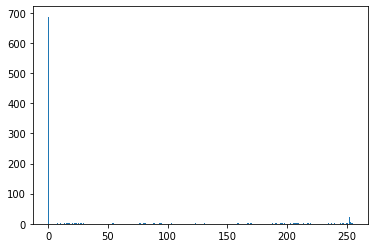

In [51]:
plt.hist(img0, bins=256)
plt.show()

* 0에 가까울수록 검은색(어두운색), 255에 가까울수록(밝은색)

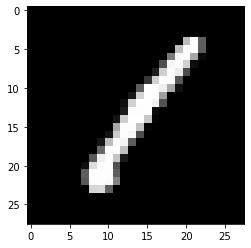

In [52]:
#숫자 이미지 확인해보자
plt.imshow(img0.values.reshape(28,28), cmap='gray')
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

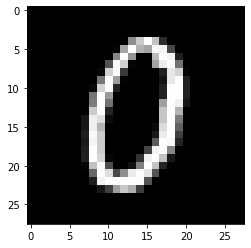

In [54]:
#다른 숫자 확인하기
img5 = digit_data.iloc[5,1:]
plt.imshow(img5.values.reshape(28,28), cmap='gray')
plt.show

* 한번에 모든 글자 출력하기 (영욱이 버전)
list1 = []
for i in range (len(digit_data)):
    list1.append(digit_data.iloc[i,1:])
    
for i in range(len(list1)):
    plt.imshow(dlist1[i].values.reshape(28,28), cmap = 'gray')
    plt.show()

### 5000장 추출

In [55]:
#행은 5000장 까지만 인덱싱
X = digit_data.iloc[:5000, 1:] #문제
y = digit_data.iloc[:5000, 0] #정답

In [56]:
print(X.shape)
print(y.shape)

(5000, 784)
(5000,)


### 훈련 데이터, 테스트 데이터 분리

In [57]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=7)

In [58]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(3500, 784)
(1500, 784)
(3500,)
(1500,)


### 모델링(교차검증 활용)
- KNN
- Decision Tree
- Logistic Regression
- Linear SVM

In [59]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score

In [60]:
## 각각의 모델들을 변수에 담아주세요!
knn = KNeighborsClassifier()
tree = DecisionTreeClassifier()
logi = LogisticRegression()
svm = LinearSVC()

In [61]:
result_knn = cross_val_score(knn, X_train, y_train, cv=5)
result_tree = cross_val_score(tree, X_train, y_train, cv =5)
result_logi = cross_val_score(logi, X_train, y_train, cv =5)
result_svm = cross_val_score(svm, X_train, y_train, cv =5)

C:\Users\SMT047\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\SMT047\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-r

In [62]:
print('knn: ', result_knn.mean())
print('tree: ', result_tree.mean())
print('logi: ', result_logi.mean())
print('svm: ', result_svm.mean())

knn:  0.9185714285714285
tree:  0.7320000000000001
logi:  0.8760000000000001
svm:  0.8225714285714286


In [63]:
tree2 = DecisionTreeClassifier(max_depth=15)
result2_tree2 = cross_val_score(tree2, X_train, y_train, cv=5)
print('tree2(max_depth: 15 ):', result2_tree2.mean())

tree2(max_depth: 15 ): 0.7314285714285715


### 스케일링

In [64]:
from sklearn.preprocessing import MinMaxScaler

In [65]:
min_max_scaler = MinMaxScaler()

In [66]:
min_max_scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [67]:
X_train_scaled = min_max_scaler.transform(X_train)
X_test_scaled = min_max_scaler.transform(X_test)

In [68]:
result2_svm = cross_val_score(svm,X_train_scaled, y_train, cv=5)

C:\Users\SMT047\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\SMT047\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\SMT047\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\SMT047\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\SMT047\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iter

In [69]:
print(result2_svm.mean())

0.8625714285714287


scatter 출력

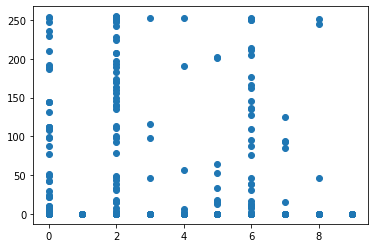

In [70]:
plt.scatter(y_train, X_train.iloc[:,500])

In [71]:
X_train_scaled[:,500]

array([0., 0., 0., ..., 0., 0., 0.])

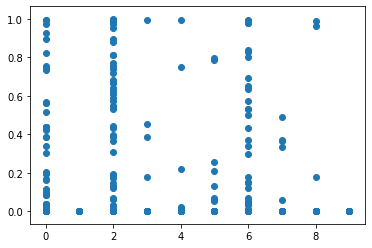

In [72]:
plt.scatter(y_train,X_train_scaled[:,500])

### test데이터 확인

In [73]:
knn.fit(X_train,y_train)
tree.fit(X_train,y_train)
logi.fit(X_train,y_train)
svm.fit(X_train_scaled,y_train)

C:\Users\SMT047\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\SMT047\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [74]:
# knn은 예측시 데이터가 많을 수록 속도가 느려진다.

In [75]:
print('tree : ', tree.score(X_test,y_test))
print('logi : ', logi.score(X_test,y_test))
print('svm : ', svm.score(X_test_scaled,y_test))
print('knn : ', knn.score(X_test,y_test))

tree :  0.7453333333333333
logi :  0.8746666666666667
svm :  0.8593333333333333
knn :  0.9113333333333333


###    예측의 불확실성

In [76]:
X_test.shape

(1500, 784)

In [77]:
knn.predict_proba(X_test[50:80])

array([[0. , 0. , 0. , 0. , 0.2, 0. , 0. , 0. , 0. , 0.8],
       [0. , 0. , 0. , 0. , 0.8, 0. , 0. , 0. , 0. , 0.2],
       [0. , 0. , 0. , 0. , 0. , 1. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0.2, 0. , 0. , 0. , 0.8, 0. , 0. ],
       [1. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0.2, 0.8, 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 1. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.6, 0. , 0.4],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 1. ],
       [0. , 0. , 0. , 0. , 0.8, 0. , 0. , 0. , 0. , 0.2],
       [0. , 0. , 0. , 0.8, 0. , 0.2, 0. , 0. , 0. , 0. ],
       [0. , 0. , 1. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.8, 0. , 0.2],
       [0. , 0. , 0. , 0. , 0.8, 0. , 0. , 0. , 0. , 0.2],
       [0. , 0. , 0. , 0. , 0. , 0.6, 0. , 0. , 0.4, 0. ],
       [0. , 0. , 0.2, 0. , 0. , 0. , 0. , 0. , 0.8, 0. ],
       [0.2, 0. , 0.2, 0. , 0. , 0.6, 0. , 0. , 0. , 0. 

In [78]:
tree.predict_proba(X_test[100:200])

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 

In [79]:
logi.predict_proba(X_test[50:80])

array([[2.50934860e-057, 4.19357429e-058, 7.76849735e-053,
        2.45267814e-056, 1.09561631e-020, 3.38947236e-062,
        1.25562087e-043, 3.33596602e-019, 4.89653756e-026,
        1.00000000e+000],
       [7.06277803e-102, 4.02176650e-064, 8.75489327e-060,
        2.20859902e-065, 1.00000000e+000, 1.15314809e-053,
        4.90166374e-055, 1.55723972e-041, 2.26088691e-043,
        3.41178359e-031],
       [1.40436603e-058, 1.51253825e-027, 2.37624840e-032,
        4.07324071e-040, 1.26118476e-034, 1.00000000e+000,
        1.49842738e-053, 1.99276557e-054, 1.72062984e-015,
        1.15254885e-049],
       [1.29967085e-094, 4.10315691e-021, 3.40828774e-006,
        8.26252116e-027, 7.84840689e-016, 5.70602655e-034,
        3.39273253e-037, 9.99996592e-001, 1.88115179e-021,
        1.38649050e-014],
       [1.00000000e+000, 4.38466911e-056, 3.53286189e-039,
        1.66547616e-047, 1.54054700e-066, 1.50448689e-030,
        2.34424123e-031, 1.75607259e-079, 1.12449258e-026,
        1.8

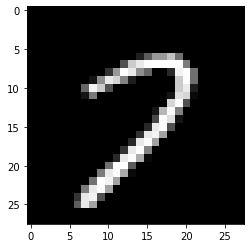

In [80]:
img = X_test.iloc[57]
plt.imshow(img.values.reshape(28,28), cmap='gray')
plt.show()

### 분류평가지표

In [81]:
from sklearn.metrics import classification_report

In [82]:
pre = knn.predict(X_test)
print(classification_report(pre,y_test))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96       155
           1       0.99      0.85      0.91       192
           2       0.90      0.97      0.94       150
           3       0.93      0.88      0.90       147
           4       0.93      0.93      0.93       138
           5       0.88      0.91      0.89       139
           6       0.96      0.95      0.95       168
           7       0.88      0.88      0.88       154
           8       0.78      0.97      0.87       112
           9       0.87      0.86      0.86       145

    accuracy                           0.91      1500
   macro avg       0.91      0.91      0.91      1500
weighted avg       0.92      0.91      0.91      1500

